# Case study - HappyCustomerBank

### Opis problemu i danych:

About Company

Happy Customer Bank is a mid-sized private bank which deals in all kinds of loans. They have presence across all major cities in India and focus on lending products. They have a digital arm which sources customers from the internet.


Problem

Digital arms of banks today face challenges with lead conversion, they source leads through mediums like search, display, email campaigns and via affiliate partners. Here Happy Customer Bank faces same challenge of low conversion ratio. They have given a problem to identify the customers segments having higher conversion ratio for a specific loan product so that they can specifically target these customers, here they have provided a partial data set for salaried customers only from the last 3 months. They also capture basic details about customers like gender, DOB, existing EMI, employer Name, Loan Amount Required, Monthly Income, City, Interaction data and many others. Let’s look at the process at Happy Customer Bank.

In above process, customer applications can drop majorly at two stages, at login and approval/ rejection by bank. Here we need to identify the segment of customers having higher disbursal rate in next 30 days.

Data Set

We have train and test data set, train data set has both input and output variable(s). Need to predict probability of disbursal for test data set.


Input variables:

- ID - Unique ID (can not be used for predictions)
- Gender- Sex
- City - Current City
- Monthly_Income - Monthly Income in rupees
- DOB - Date of Birth
- Lead_Creation_Date - Lead Created on date
- Loan_Amount_Applied - Loan Amount Requested (INR)
- Loan_Tenure_Applied - Loan Tenure Requested (in years)
- Existing_EMI - EMI of Existing Loans (INR)
- Employer_Name - Employer Name
- Salary_Account- Salary account with Bank
- Mobile_Verified - Mobile Verified (Y/N)
- Var5- Continuous classified variable
- Var1- Categorical variable with multiple levels
- Loan_Amount_Submitted- Loan Amount Revised and Selected after seeing Eligibility
- Loan_Tenure_Submitted- Loan Tenure Revised and Selected after seeing Eligibility (Years)
- Interest_Rate- Interest Rate of Submitted Loan Amount
- Processing_Fee- Processing Fee of Submitted Loan Amount (INR)
- EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR)
- Filled_Form- Filled Application form post quote
- Device_Type- Device from which application was made (Browser/ Mobile)
- Var2- Categorical Variable with multiple Levels
- Source- Categorical Variable with multiple Levels
- Var4- Categorical Variable with multiple Levels

Outcomes:

- LoggedIn- Application Logged (Variable for understanding the problem – cannot be used in prediction)
- Disbursed- Loan Disbursed (Target Variable)

Źródło:

https://discuss.analyticsvidhya.com/t/hackathon-3-x-predict-customer-worth-for-happy-customer-bank/3802

### Interesują nas dwie miary jakości rozwiązania: 
- AUC
- Zysk, liczony w następujący sposób:

  - zaklasyfikowanie obserwacji jako 1 kosztuje nas 100 zł (tzn. nasz model przypisuje obserwacji klasę 1),
  - trafienie predykcją w klasę 1 przynosi nam 1000 zł zarobku.

Cel: osiągnąć jak największy zysk.

## Import of the relevant packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data preparation

In [2]:
data_train = pd.read_csv('Data/Train_nyOWmfK.csv', encoding="latin1")
data_test = pd.read_csv('Data/Test_bCtAN1w.csv', encoding="latin1")

In [3]:
data_test['Disbursed'] = np.nan
data = pd.concat([data_train, data_test], axis=0, sort=False)
data.drop('ID', inplace=True, axis=1)
data.drop('LoggedIn', inplace=True, axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124737 entries, 0 to 37716
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Gender                 124737 non-null  object 
 1   City                   123336 non-null  object 
 2   Monthly_Income         124737 non-null  int64  
 3   DOB                    124737 non-null  object 
 4   Lead_Creation_Date     124737 non-null  object 
 5   Loan_Amount_Applied    124626 non-null  float64
 6   Loan_Tenure_Applied    124626 non-null  float64
 7   Existing_EMI           124626 non-null  float64
 8   Employer_Name          124624 non-null  object 
 9   Salary_Account         107936 non-null  object 
 10  Mobile_Verified        124737 non-null  object 
 11  Var5                   124737 non-null  int64  
 12  Var1                   124737 non-null  object 
 13  Loan_Amount_Submitted  75202 non-null   float64
 14  Loan_Tenure_Submitted  75202 non-null

In [5]:
data.isna().sum()

Gender                       0
City                      1401
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied        111
Loan_Tenure_Applied        111
Existing_EMI               111
Employer_Name              113
Salary_Account           16801
Mobile_Verified              0
Var5                         0
Var1                         0
Loan_Amount_Submitted    49535
Loan_Tenure_Submitted    49535
Interest_Rate            84901
Processing_Fee           85346
EMI_Loan_Submitted       84901
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
Disbursed                37717
dtype: int64

### Target Variable: Disbursed

In [6]:
disbursed_counts = data['Disbursed'].value_counts()
disbursed_counts

0.0    85747
1.0     1273
Name: Disbursed, dtype: int64

In [7]:
# Target classes are highligh imbalanced (label [0] is about 67 times more frequent than labl [1])
disbursed_counts[0]/disbursed_counts[1]

67.35820895522389

In [8]:
# THe list below will store consecutive feature names treated as a categorical ones during analysis
CATEGORICAL_FEATURES = []

### Variable: Gender

In [9]:
# We establish that there are no missing values in the dataset
data['Gender'].isna().sum()

0

In [10]:
data['Gender'].value_counts()

Male      71398
Female    53339
Name: Gender, dtype: int64

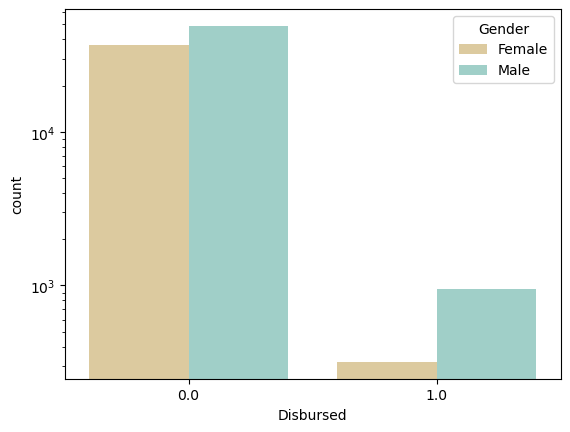

In [11]:
sns.countplot(x = 'Disbursed', hue = 'Gender', data = data, palette = 'BrBG')
plt.yscale('log')

In [12]:
CATEGORICAL_FEATURES.append('Gender')

### Variable: City

In [13]:
data['City'].isna().sum()

1401

In [14]:
# We can fill missing valubes with "NotGiven" category
data.City.fillna('NotGiven', inplace = True)

In [15]:
data.City.value_counts()

Delhi         17936
Bengaluru     15522
Mumbai        15425
Hyderabad     10410
Chennai        9895
              ...  
Umaria            1
CHOTILA           1
Bageshwar         1
Seoni             1
Karim Ganj        1
Name: City, Length: 724, dtype: int64

In [16]:
# One possible approach is to create separate categories for most popular cities, 
# putting the rest of sample into "Other" category
frequent_cities = data.City.value_counts().iloc[:15]

In [17]:
data['City'] = data.City.apply(lambda x: x if x in frequent_cities else 'Other')

In [18]:
data.City.value_counts()

Other         30896
Delhi         17936
Bengaluru     15522
Mumbai        15425
Hyderabad     10410
Chennai        9895
Pune           7427
Kolkata        4282
Ahmedabad      2528
Jaipur         1892
Gurgaon        1743
Coimbatore     1659
NotGiven       1401
Thane          1306
Chandigarh     1266
Surat          1149
Name: City, dtype: int64

In [19]:
CATEGORICAL_FEATURES.append("City")

### Variable: Monthly_Income

In [20]:
data['Monthly_Income'].isna().sum()

0

In [21]:
data['Monthly_Income'].describe()

count    1.247370e+05
mean     5.309073e+04
std      1.823394e+06
min      0.000000e+00
25%      1.650000e+04
50%      2.500000e+04
75%      4.000000e+04
max      4.445544e+08
Name: Monthly_Income, dtype: float64

<AxesSubplot:ylabel='Frequency'>

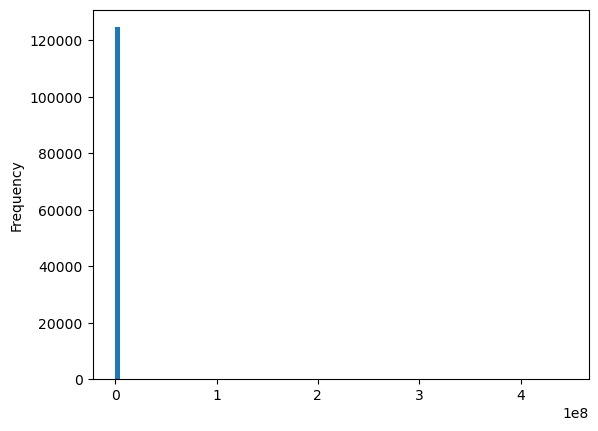

In [22]:
data['Monthly_Income'].plot.hist(bins =100)

<AxesSubplot:ylabel='Frequency'>

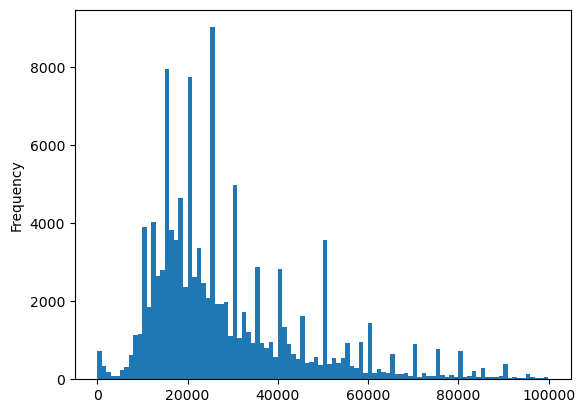

In [23]:
data[data['Monthly_Income'] < 10e4]['Monthly_Income'].plot.hist(bins = 100)

In [24]:
#The variable has a skewed distribution. In order to handle such a big range of skewed values, we can introduce logarithmic
#transformation as additional feature classification.

In [25]:
data['Monthly_Income_Log'] = np.log10(data['Monthly_Income'] + 1)

<AxesSubplot:ylabel='Frequency'>

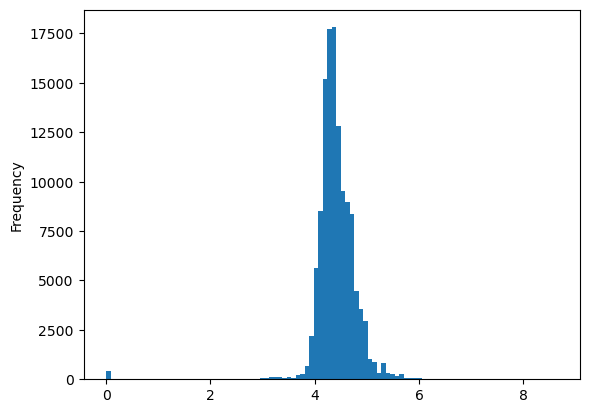

In [26]:
data['Monthly_Income_Log'].plot.hist(bins=100)

C:\ProgramData\Anaconda3x2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3x2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


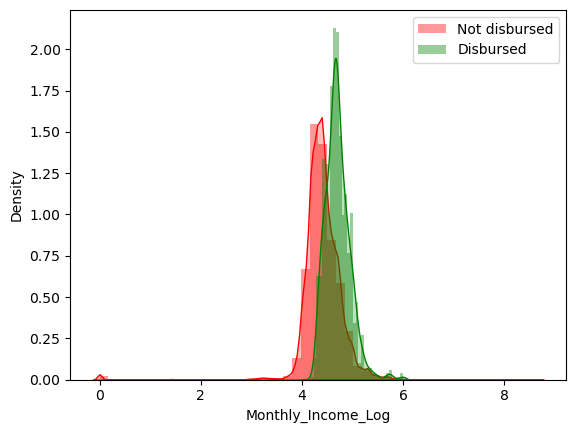

In [27]:
sns.distplot(data[data['Disbursed'] == 0]['Monthly_Income_Log'], hist = True, color = 'r', kde_kws={'shade': True},
                                                                                                   label='Not disbursed')
sns.distplot(data[data['Disbursed'] == 1]['Monthly_Income_Log'], hist = True, color = 'g', kde_kws={'shade': True},
                                                                                                   label='Disbursed')
plt.legend()

### Variable: DOB

In [28]:
data['DOB'].isna().sum()

0

In [30]:
# Using date of birth, and considering the fact that data comes from 2015, we can calculate age
# The rest of information can be dropped
data['Age'] = data.DOB.apply(lambda dt: 2015 - (1900 + int(dt[-2:])))
data.drop('DOB', inplace = True, axis =1)

C:\ProgramData\Anaconda3x2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3x2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


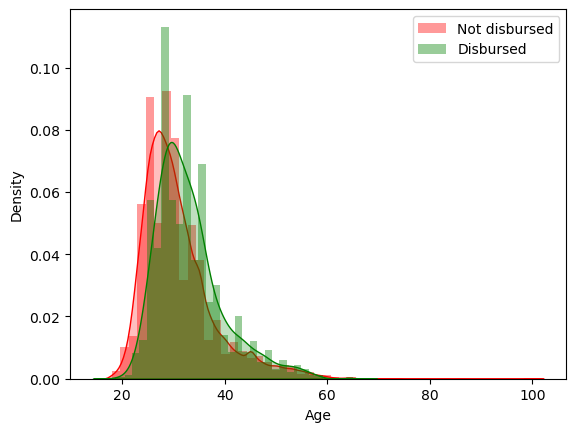

In [34]:
# Show the distribution according to age
sns.distplot(data[data['Disbursed'] == 0]['Age'], hist = True, color = 'r', kde_kws={'shade' :True}, label = 'Not disbursed')
sns.distplot(data[data['Disbursed'] == 1]['Age'], hist = True, color = 'g', kde_kws={'shade': True}, label = 'Disbursed')
plt.legend()

### Variable: Lead_Creation_Date

In [36]:
data['Lead_Creation_Date'].isna().sum()

0

In [37]:
data.Lead_Creation_Date.apply(lambda dt: dt[-2:]).unique()

array(['15'], dtype=object)

In [38]:
# All operations were made in 2015, so year won't help us in predicting target value. 
# We can use the information of month instead.
data['Lead_Creation_Month'] = data.Lead_Creation_Date.apply(lambda dt: dt[3:-3])
data['Lead_Creation_Month'].unique()

array(['May', 'Jun', 'Jul'], dtype=object)

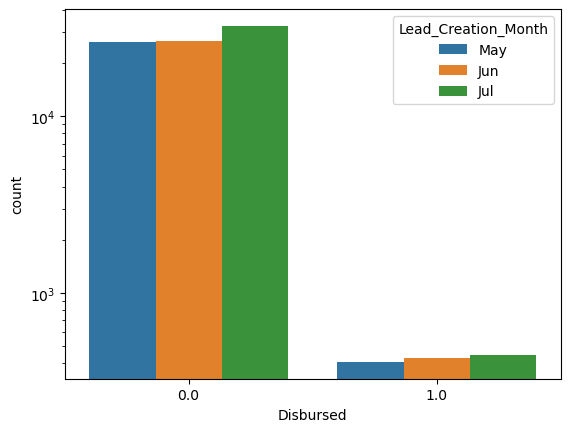

In [39]:
sns.countplot(x = "Disbursed", hue = 'Lead_Creation_Month', data = data)
plt.yscale('log')

In [40]:
data.drop('Lead_Creation_Date', inplace = True, axis = 1)

In [41]:
CATEGORICAL_FEATURES.append('Lead_Creation_Month')

### Variable: Loan_Amount_Applied

In [43]:
data['Loan_Amount_Applied'].isna().sum()

111

In [44]:
data.Loan_Amount_Applied.value_counts()

0.0          41314
100000.0     20627
200000.0     18705
300000.0     14334
500000.0     13905
             ...  
1052000.0        1
5500.0           1
194000.0         1
447000.0         1
7500.0           1
Name: Loan_Amount_Applied, Length: 320, dtype: int64

In [46]:
# We can aggregate 41314 zeros and 111 missing values into one feature called 'Missing_Loan_Amount_Applied'
data['Missing_Loan_Amount_Applied'] = data.Loan_Amount_Applied.isna() | (data.Loan_Amount_Applied == 0.0)

In [48]:
data['Missing_Loan_Amount_Applied'].value_counts()

False    83312
True     41425
Name: Missing_Loan_Amount_Applied, dtype: int64

In [49]:
# Missing values can be replaced either by zeros (as most frequent value) or more sophisticated statistics (like median sampling from distribution)
# In this case they will be replaced by zeros.
data.loc[data.Loan_Amount_Applied.isna(), 'Loan_Amount_Applied'] = 0.0

In [50]:
CATEGORICAL_FEATURES.append('Missing_Loan_Amount_Applied')

### Variable: Loan_Tenure_Applied

In [51]:
data['Loan_Tenure_Applied'].isna().sum()

111

In [52]:
data.Loan_Tenure_Applied.value_counts()

0.0     48380
5.0     27464
3.0     18800
2.0     13490
4.0      9556
1.0      6864
10.0       61
7.0         6
6.0         3
9.0         1
8.0         1
Name: Loan_Tenure_Applied, dtype: int64

In [53]:
# The same approach as before
data['Missing_Loan_Tenure_Applied'] = data.Loan_Tenure_Applied.isna() | (data.Loan_Tenure_Applied == 0.0)

In [54]:
data.loc[data.Loan_Tenure_Applied.isna(), 'Loan_Tenure_Applied'] = 0.0

In [55]:
CATEGORICAL_FEATURES.append('Missing_Loan_Tenure_Applied')

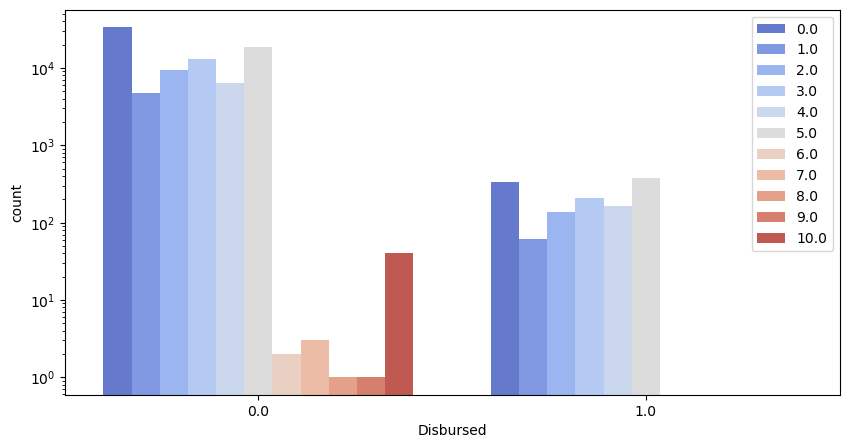

In [57]:
plt.figure(figsize = (10,5))
sns.countplot(x='Disbursed', hue='Loan_Tenure_Applied', data=data, palette='coolwarm')
plt.yscale('log')
plt.legend(loc='upper right')

### Variable: Existing_EMI

In [58]:
data.Existing_EMI.isna().sum()

111

In [61]:
data.Existing_EMI.value_counts() / len(data)*100

0.0        66.902363
5000.0      3.051220
10000.0     2.017044
3000.0      1.759702
4000.0      1.427002
             ...    
2519.0      0.000802
8663.0      0.000802
230.0       0.000802
46990.0     0.000802
4364.0      0.000802
Name: Existing_EMI, Length: 4704, dtype: float64

In [62]:
# The same strategy as with Loan_Amount_Applied and Loan_Tenure_Applied
data['Missing_Existing_EMI'] = data.Existing_EMI.isna() | (data.Existing_EMI == 0.0)
data.loc[data.Existing_EMI.isna(), 'Existing_EMI'] = 0.0

In [63]:
CATEGORICAL_FEATURES.append('Missing_Existing_EMI')

### Variable: Employer_Name

In [65]:
data.Employer_Name.isna().sum()

113

In [66]:
data['Employer_Name'].value_counts()

0                                               6900
TATA CONSULTANCY SERVICES LTD (TCS)              754
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD     558
ACCENTURE SERVICES PVT LTD                       476
GOOGLE                                           408
                                                ... 
DESAI INFRA PROJECTS INDIA PVT LTD                 1
RKR ENGINEERS                                      1
KHODAY INDIA LTD                                   1
NEXGEN TECHNOLOGIES PVT LTD                        1
NINE A BUSINESS CONNECT PRIVATE LIMTED             1
Name: Employer_Name, Length: 57193, dtype: int64

In [73]:
# We can replace missing values and zeros with 'Other' field
data.loc[data.Employer_Name.isna() | (data.Employer_Name == '0'), 'Employer_Name'] = 'NotGiven'

In [74]:
data['Employer_Name'].value_counts()

NotGiven                                        7013
TATA CONSULTANCY SERVICES LTD (TCS)              754
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD     558
ACCENTURE SERVICES PVT LTD                       476
GOOGLE                                           408
                                                ... 
DESAI INFRA PROJECTS INDIA PVT LTD                 1
RKR ENGINEERS                                      1
KHODAY INDIA LTD                                   1
NEXGEN TECHNOLOGIES PVT LTD                        1
NINE A BUSINESS CONNECT PRIVATE LIMTED             1
Name: Employer_Name, Length: 57193, dtype: int64

In [81]:
# We are still left with 57k unique values, we can group values by their mean Disbursed score and split them into few buckets
employer_means = data_train.groupby('Employer_Name')['Disbursed'].mean()

In [82]:
employer_means

Employer_Name
                                                                                                           0.0
                                                                                                           0.0
                                                                                                           0.0
  ADLER MEDIEQUIP PVT LTD                                                                                  0.0
  MN&C SUPPLY LINKS RETAIL PVT. LTD                                                                        0.0
                                                                                                          ... 
burger king india pvt ltd                                                                                  0.0
ordnante factory                                                                                           0.0
other                                                                                             

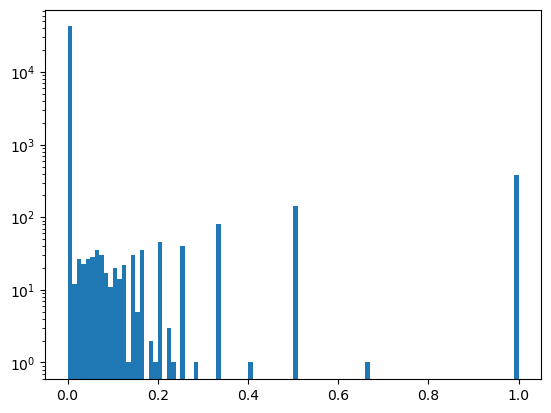

In [80]:
plt.hist(employer_means.values, bins = 100)
plt.yscale('log')

In [83]:
mapping_dict = dict(pd.cut(employer_means[employer_means.index != 'NotGiven'], 5, labels=range(5)))

In [84]:
data['Employer_Name'] = data.Employer_Name.apply(lambda x: mapping_dict[x] if x in mapping_dict.keys() 
                                                 else x if x == 'NotGiven' 
                                                 else 'Other')

In [85]:
data['Employer_Name'].value_counts()

0           101712
Other        14517
NotGiven      7013
1              649
4              454
2              389
3                3
Name: Employer_Name, dtype: int64

In [86]:
CATEGORICAL_FEATURES.append('Employer_Name')

### Variable: Salary_Account

In [88]:
data.Salary_Account.isna().sum()

16801

In [89]:
data.Salary_Account.value_counts()

HDFC Bank                                          25180
ICICI Bank                                         19547
State Bank of India                                17110
Axis Bank                                          12590
Citibank                                            3398
Kotak Bank                                          2955
IDBI Bank                                           2213
Punjab National Bank                                1747
Bank of India                                       1713
Bank of Baroda                                      1675
Standard Chartered Bank                             1434
Canara Bank                                         1385
Union Bank of India                                 1330
Yes Bank                                            1120
ING Vysya                                            996
Corporation bank                                     948
Indian Overseas Bank                                 901
State Bank of Hyderabad        

In [90]:
# Similarly to the Employer_Name variable, we can encampsulate less frequent banks into larger groups by their mean Disbursed score.
# But first, we need to fill missing values, e.g. by random sampling from existing values.
import random
mask = data['Salary_Account'].isnull()
samples = random.choices(data['Salary_Account'][~mask].values , k=mask.sum())
data.loc[mask, 'Salary_Account'] = samples

In [91]:
data['Salary_Account'].isna().sum()

0

In [92]:
# How many applications were Disbursed to customers of those banks 
account_means = data_train.groupby('Salary_Account')['Disbursed'].mean()

<AxesSubplot:xlabel='Salary_Account'>

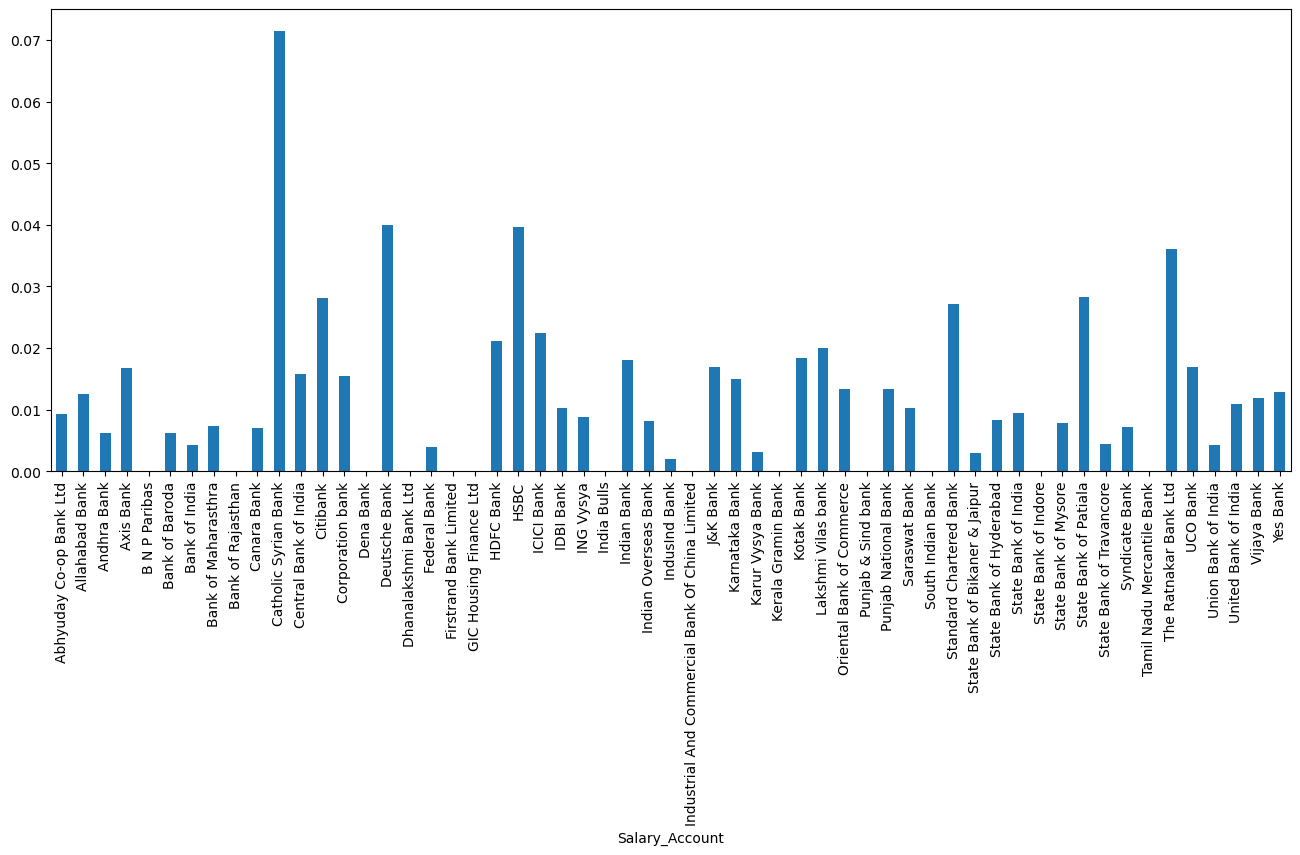

In [93]:
account_means.plot.bar(figsize = (16,6))

In [95]:
mapping_dict = dict(pd.cut(account_means[(account_means.index != 'HDFC Bank') &
                                         (account_means.index != 'ICICI Bank') &
                                         (account_means.index != 'State Bank of India') &
                                         (account_means.index != 'Axis Bank')], 5, labels = range(5)))

In [96]:
data['Salary_Account'] = data.Salary_Account.apply(lambda account: mapping_dict[account] if account in mapping_dict.keys()
                                                  else account if account in ['HDFC Bank','ICICI Bank','State Bank of India','Axis Bank']
                                                  else 'Other')

In [97]:
CATEGORICAL_FEATURES.append('Salary_Account')

### Variable: Mobile_Verified

In [99]:
data.Mobile_Verified.isna().sum()

0

In [100]:
data.Mobile_Verified.value_counts()

Y    80928
N    43809
Name: Mobile_Verified, dtype: int64

<AxesSubplot:xlabel='Disbursed', ylabel='count'>

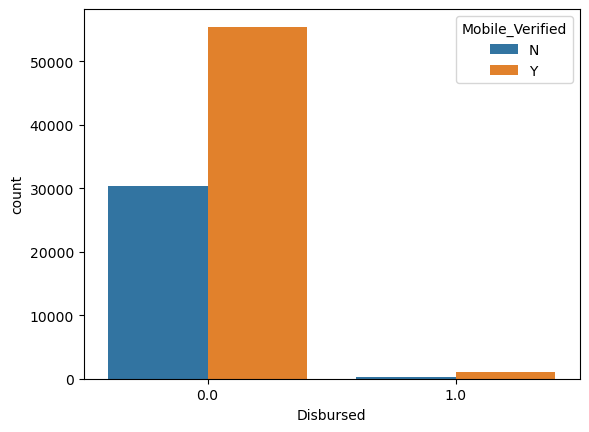

In [101]:
sns.countplot(x = 'Disbursed', hue = 'Mobile_Verified', data = data)

In [102]:
CATEGORICAL_FEATURES.append('Mobile_Verified')

### Variable: Var1

In [103]:
data.Var1.isna().sum()

0

In [104]:
data.Var1.value_counts()

HBXX    84901
HBXC    12952
HBXB     6502
HAXA     4214
HBXA     3042
HAXB     2879
HBXD     2818
HAXC     2171
HBXH     1387
HCXF      990
HAYT      710
HAVC      570
HAXM      386
HCXD      348
HCYS      318
HVYS      252
HAZD      161
HCXG      114
HAXF       22
Name: Var1, dtype: int64

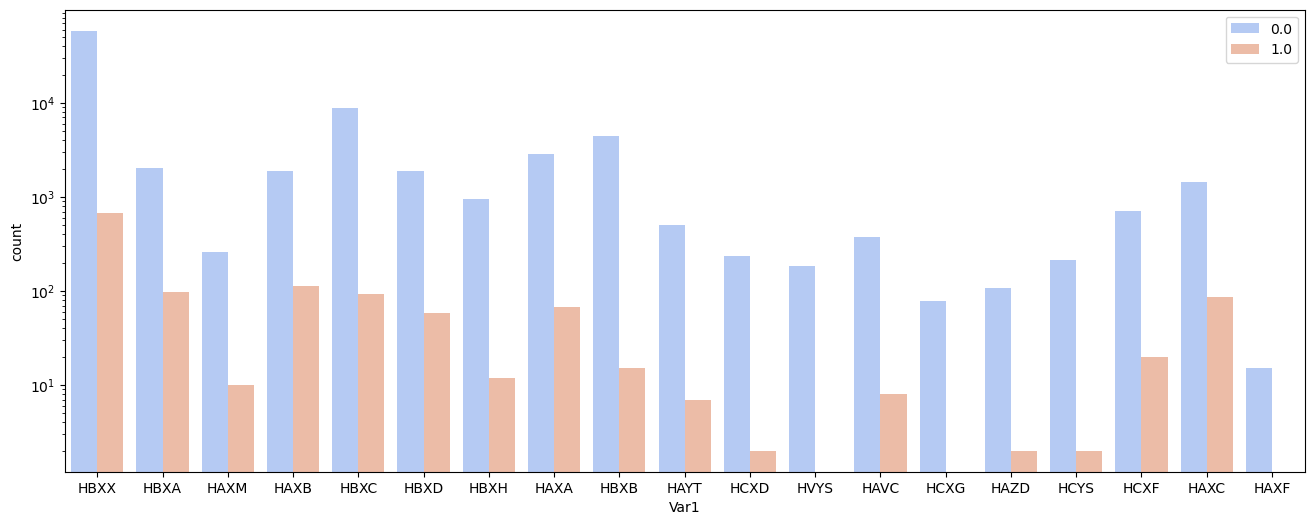

In [105]:
plt.figure(figsize=(16,6))
sns.countplot(x='Var1',hue='Disbursed',data=data, palette='coolwarm')
plt.yscale('log')
plt.legend(loc='upper right')

In [107]:
# Similarly to the Employer_Name variable we can encapsulate less frequent categories into larger groups by their mean Disbursed score.
var1_means = data_train.groupby('Var1')['Disbursed'].mean()
mapping_dict = dict(pd.cut(var1_means[var1_means.index != 'HBXX'], 5, labels=range(5)))
data["Var1"] = data.Var1.apply(lambda var1: mapping_dict[var1] if var1 in mapping_dict.keys()
                               else 'Other')

In [108]:
CATEGORICAL_FEATURES.append('Var1')

### Variable: Var2

In [110]:
data['Var2'].isna().sum()

0

In [112]:
data.Var2.value_counts()

B    53481
G    47338
C    20366
E     1855
D      918
F      770
A        9
Name: Var2, dtype: int64

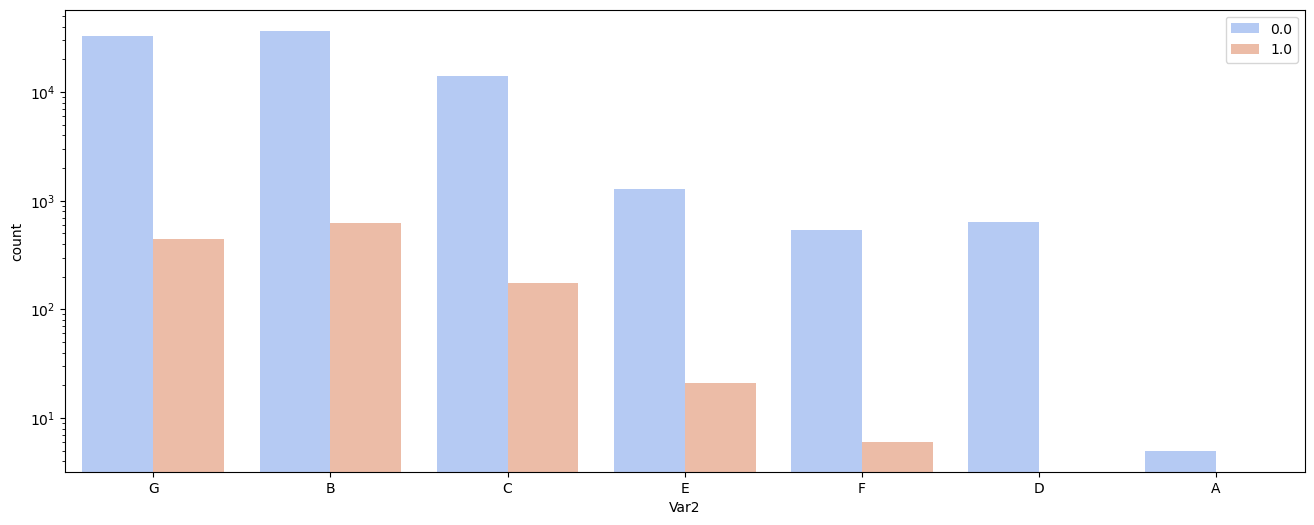

In [114]:
plt.figure(figsize=(16,6))
sns.countplot(x = 'Var2', hue = 'Disbursed', data=data, palette='coolwarm')
plt.yscale('log')
plt.legend(loc = 'upper right')

In [115]:
CATEGORICAL_FEATURES.append('Var2')

### Variable: Var4

In [116]:
data['Var4'].isna().sum()

0

In [118]:
data['Var4'].value_counts()

3    36280
1    34316
5    29092
4     9411
2     8481
0     3564
7     3264
6      329
Name: Var4, dtype: int64

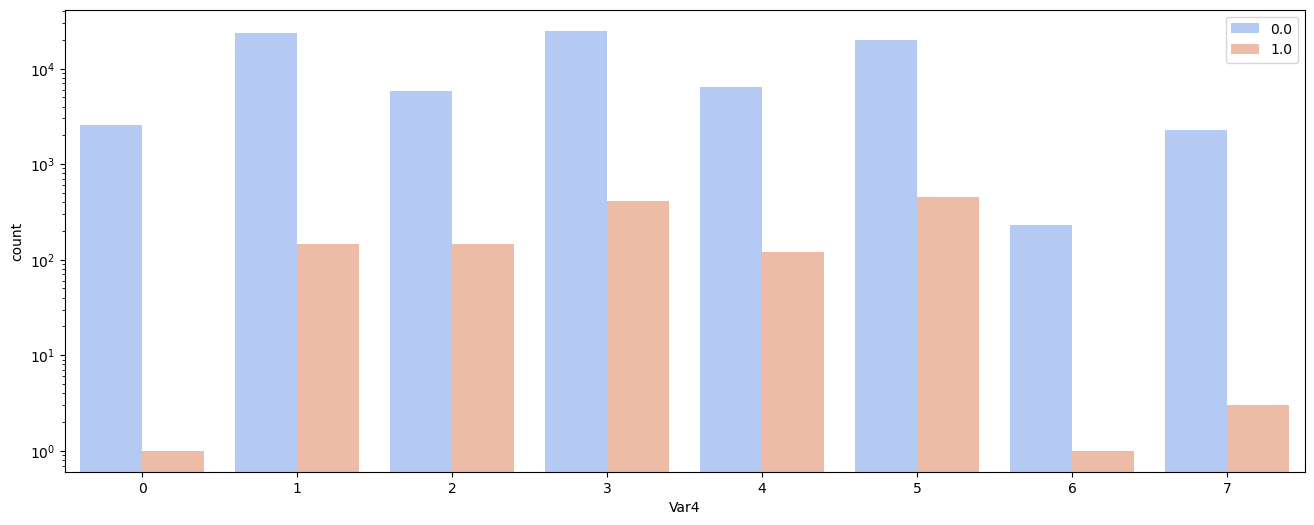

In [121]:
plt.figure(figsize=(16,6))
sns.countplot(x='Var4', hue='Disbursed', data=data, palette='coolwarm')
plt.yscale('log')
plt.legend(loc='upper right')

In [122]:
CATEGORICAL_FEATURES.append("Var4")

### Variable: Var5

In [123]:
data['Var5'].isna().sum()

0

In [124]:
data['Var5'].value_counts()

0     41584
1     17562
3      9593
11     7427
2      6532
14     5227
15     5023
12     4290
13     3749
8      3629
10     3492
9      3290
16     3096
4      2639
17     2376
7      2115
5      1428
6      1406
18      279
Name: Var5, dtype: int64

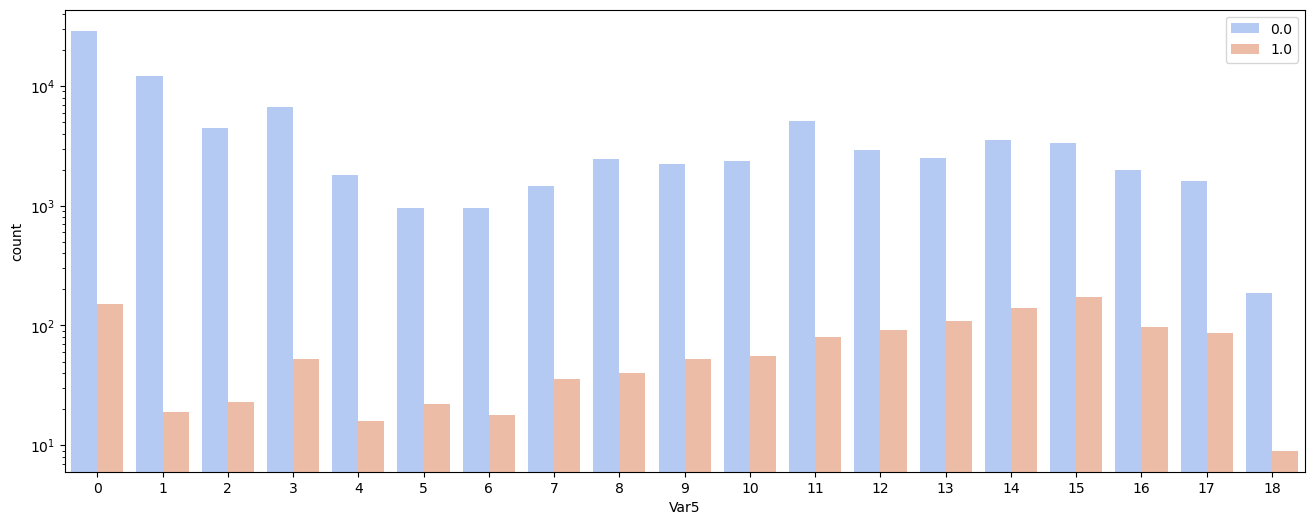

In [125]:
plt.figure(figsize=(16,6))
sns.countplot(x='Var5', hue='Disbursed', data=data, palette='coolwarm')
plt.yscale('log')
plt.legend(loc='upper right')

In [126]:
CATEGORICAL_FEATURES.append('Var5')

### Variable: Loan_Amount_Submitted

In [135]:
data['Loan_Amount_Submitted'].isna().sum()/len(data)*100

39.71155310773868

In [130]:
#In case of missing about 40% values, there in necessity for creating new feature informing abount missing data.
data['Missing_Loan_Amount_Submitted'] = data.Loan_Amount_Submitted.isna()

In [131]:
CATEGORICAL_FEATURES.append('Missing_Loan_Amount_Submitted')

<AxesSubplot:ylabel='Frequency'>

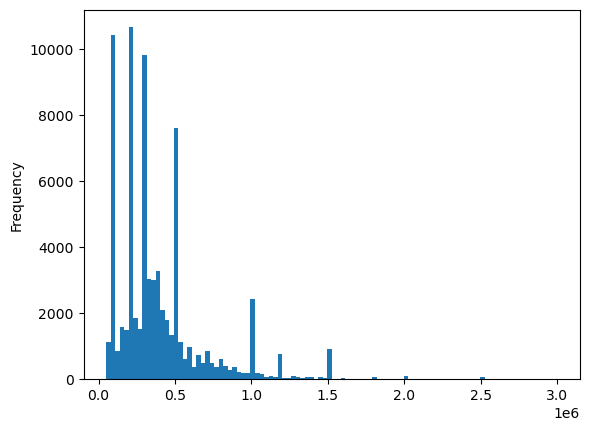

In [132]:
data['Loan_Amount_Submitted'].plot.hist(bins=100)

In [133]:
# The distribution is skewed, so we can apply log transform in order to normalize data.
data["Loan_Amount_Submitted"] = np.log10(data['Loan_Amount_Submitted'] + 1)

<AxesSubplot:ylabel='Frequency'>

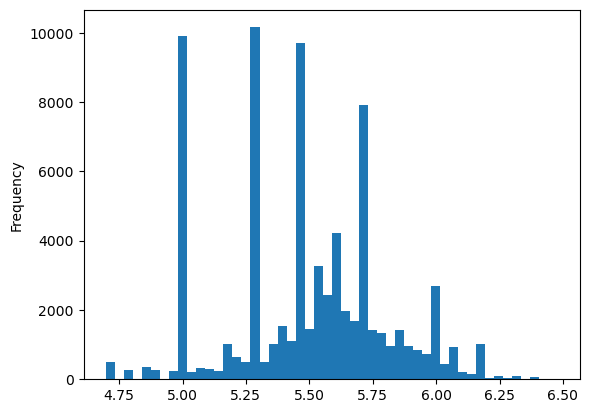

In [134]:
data['Loan_Amount_Submitted'].plot.hist(bins=50)

In [136]:
# Next, we may estimate mean and std of created seminormal distribution for filling missing values.
data['Loan_Amount_Submitted'].fillna(pd.Series(
[np.random.normal(loc=data.Loan_Amount_Submitted.mean(),
                scale=data.Loan_Amount_Submitted.std())
for x in range(len(data))]),
inplace=True)

### Variable: Loan_Tenure_Submitted

In [139]:
data['Loan_Tenure_Submitted'].isna().sum()

49535

In [142]:
# The same strategy as with Loan_Amount_Submitted
data['Missing_Loan_Tenure_Submitted'] = data.Loan_Tenure_Submitted.isna()
CATEGORICAL_FEATURES.append('Missing_Loan_Tenure_Submitted')

data['Loan_Tenure_Submitted'].value_counts()

5.0    29803
4.0    21820
3.0    12734
2.0     7580
1.0     3259
6.0        6
Name: Loan_Tenure_Submitted, dtype: int64

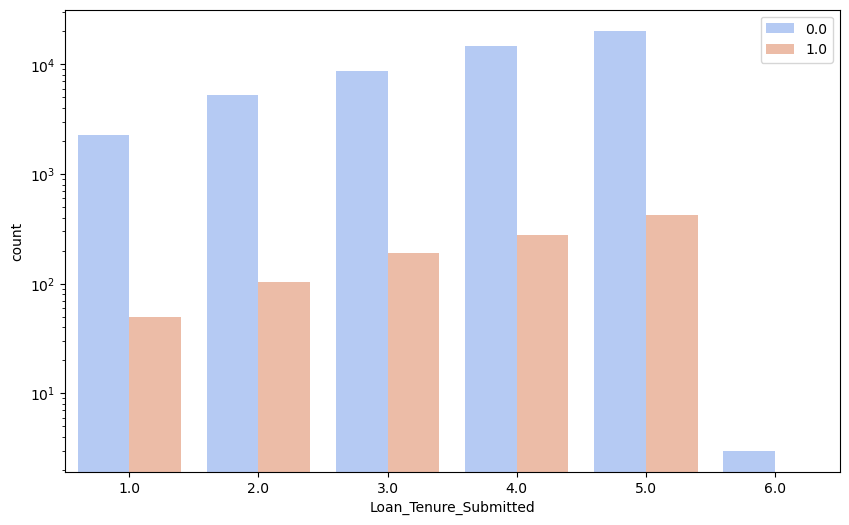

In [141]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Loan_Tenure_Submitted", hue="Disbursed", data=data, palette='coolwarm')
plt.yscale('log')
plt.legend(loc='upper right')

In [144]:
mask = data['Loan_Tenure_Submitted'].isnull()
samples = random.choices(data['Loan_Tenure_Submitted'][~mask].values , k=mask.sum())
data.loc[mask, 'Loan_Tenure_Submitted'] = samples

In [145]:
CATEGORICAL_FEATURES.append('Loan_Tenure_Submitted')

### Variable: Interest_Rate

In [147]:
data['Interest_Rate'].isna().sum()/len(data)*100

68.06400667003375

In [148]:
# With such a high missing values ratio (about 2/3), we can apply the same strategy as with Loan_Amount_Submitted
data['Missing_Interest_Rate'] = data.Loan_Amount_Submitted.isna()
CATEGORICAL_FEATURES.append('Missing_Interest_Rate')

<AxesSubplot:ylabel='Frequency'>

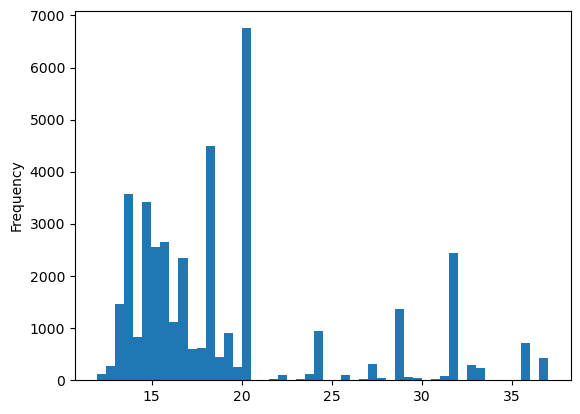

In [149]:
data['Interest_Rate'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

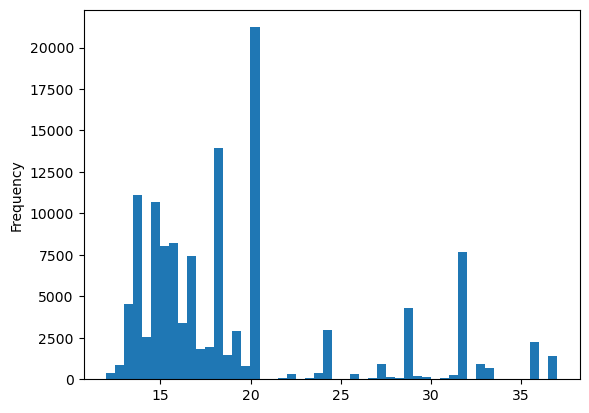

In [151]:
mask = data['Interest_Rate'].isnull()
samples = random.choices(data['Interest_Rate'][~mask].values, k=mask.sum())
data.loc[mask,'Interest_Rate'] = samples
data['Interest_Rate'].plot.hist(bins=50)

### Variable: Processing_Fee

In [153]:
data.Processing_Fee.isna().sum()/ len(data) * 100

68.42075727330304

In [154]:
# With such a high missing values ratio (about 2/3), we can apply the same strategy as with Interest_Rate
data['Missing_Processing_Fee'] = data.Processing_Fee.isna()
CATEGORICAL_FEATURES.append('Missing_Processing_Fee')

<AxesSubplot:ylabel='Frequency'>

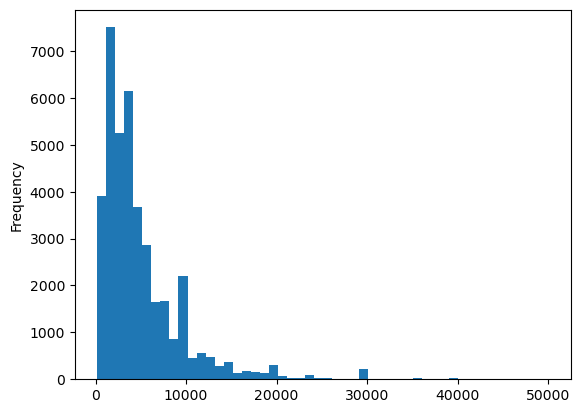

In [155]:
data['Processing_Fee'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

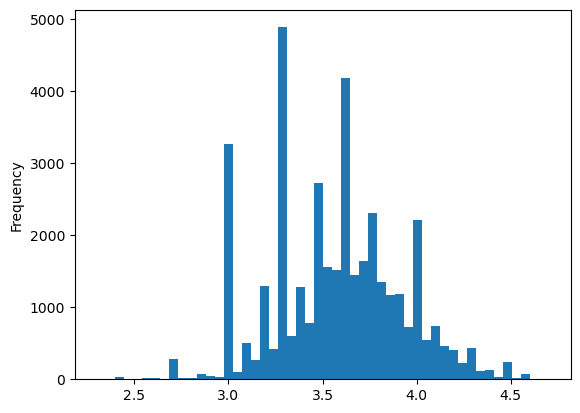

In [156]:
data['Processing_Fee'] = np.log10(data['Processing_Fee'] + 1)
data['Processing_Fee'].plot.hist(bins=50)

In [157]:
# We can estimate mean and std of created seminormal distribution for filling missing values.
data['Processing_Fee'].fillna(
    pd.Series(
        [np.random.normal(loc=data.Processing_Fee.mean(), 
                          scale=data.Processing_Fee.std()) 
         for x in range(len(data))]
    ),
    inplace=True
)

<AxesSubplot:ylabel='Frequency'>

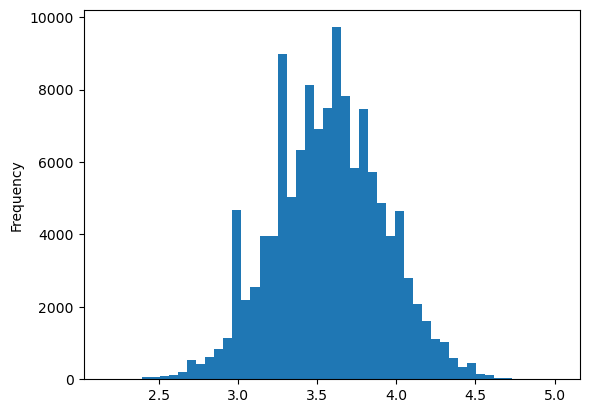

In [158]:
data['Processing_Fee'].plot.hist(bins=50)

### Variable: EMI_Loan_Submitted

In [159]:
data['EMI_Loan_Submitted'].isna().sum()

84901

In [161]:
data['Missing_EMI_Loan_Submitted'] = data.EMI_Loan_Submitted.isna()
CATEGORICAL_FEATURES.append('Missing_EMI_Loan_Submitted')

<AxesSubplot:ylabel='Frequency'>

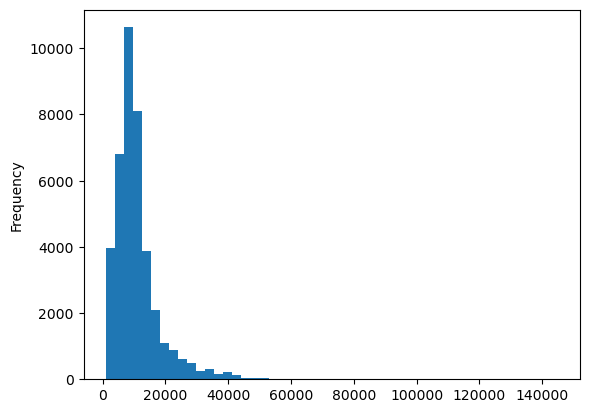

In [162]:
data['EMI_Loan_Submitted'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

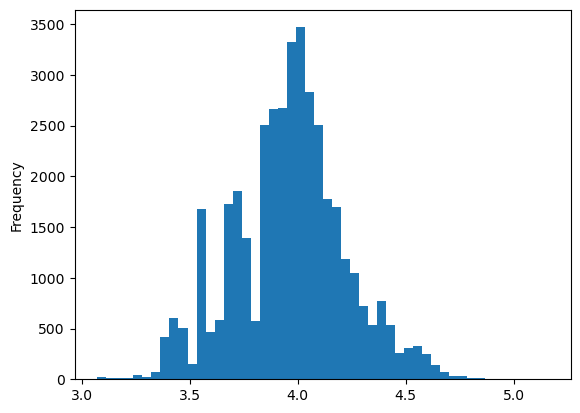

In [165]:
data['EMI_Loan_Submitted'] = np.log10(data['EMI_Loan_Submitted'] + 1)
data['EMI_Loan_Submitted'].plot.hist(bins=50)

In [166]:
data['EMI_Loan_Submitted'].fillna(
    pd.Series(
        [np.random.normal(loc=data.EMI_Loan_Submitted.mean(), 
                          scale=data.EMI_Loan_Submitted.std()) 
         for x in range(len(data))]
    ),
    inplace=True
)

<AxesSubplot:ylabel='Frequency'>

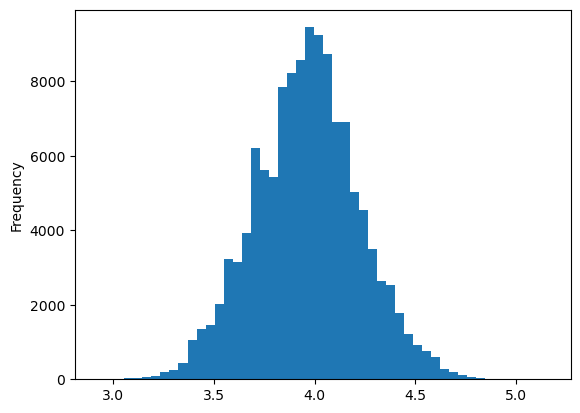

In [167]:
data['EMI_Loan_Submitted'].plot.hist(bins=50)

### Variable: Filled_Form

In [168]:
data['Filled_Form'].isna().sum()

0

In [169]:
data['Filled_Form'].value_counts()

N    96740
Y    27997
Name: Filled_Form, dtype: int64

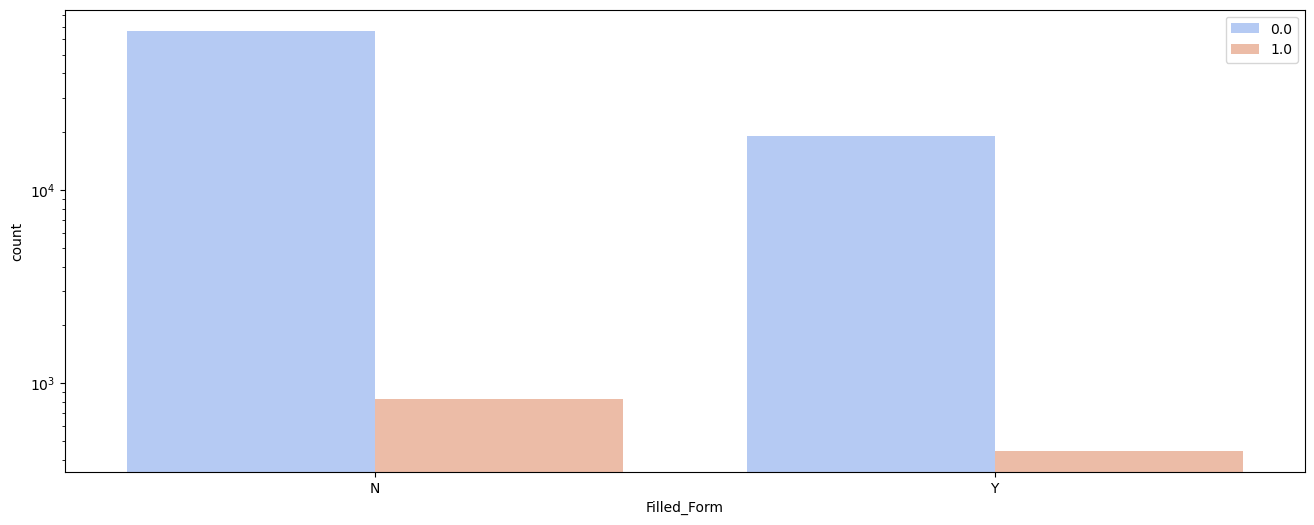

In [170]:
plt.figure(figsize=(16,6))
sns.countplot(x='Filled_Form', hue='Disbursed',data=data, palette='coolwarm')
plt.yscale('log')
plt.legend(loc='upper right')

In [171]:
CATEGORICAL_FEATURES.append('Filled_Form')

### Variable: Device_Type

In [172]:
data['Device_Type'].isna().sum()

0

In [173]:
data['Device_Type'].value_counts()

Web-browser    92105
Mobile         32632
Name: Device_Type, dtype: int64

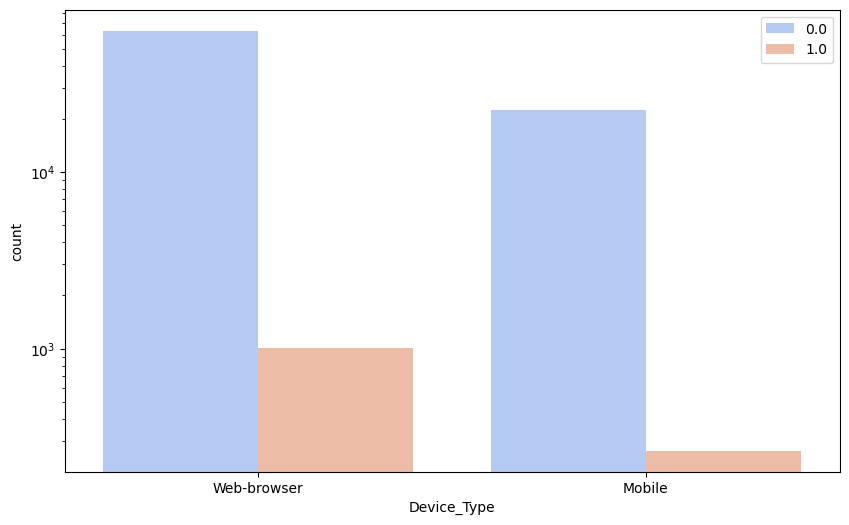

In [174]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Device_Type", hue="Disbursed", data=data, palette='coolwarm')
plt.yscale('log')
plt.legend(loc='upper right')

In [175]:
CATEGORICAL_FEATURES.append('Device_Type')

### Variable: Source

In [176]:
data['Source'].isna().sum()

0

In [177]:
data['Source'].value_counts()

S122    55249
S133    42900
S159     7999
S143     6140
S127     2804
S137     2450
S134     1900
S161     1109
S151     1018
S157      929
S153      705
S144      447
S156      432
S158      294
S123      112
S141       83
S162       60
S124       43
S150       19
S160       11
S136        5
S155        5
S138        5
S129        4
S139        4
S135        2
S130        1
S125        1
S154        1
S140        1
S142        1
S126        1
S131        1
S132        1
Name: Source, dtype: int64

In [178]:
source_means = data_train.groupby('Source')['Disbursed'].mean()

<AxesSubplot:xlabel='Source'>

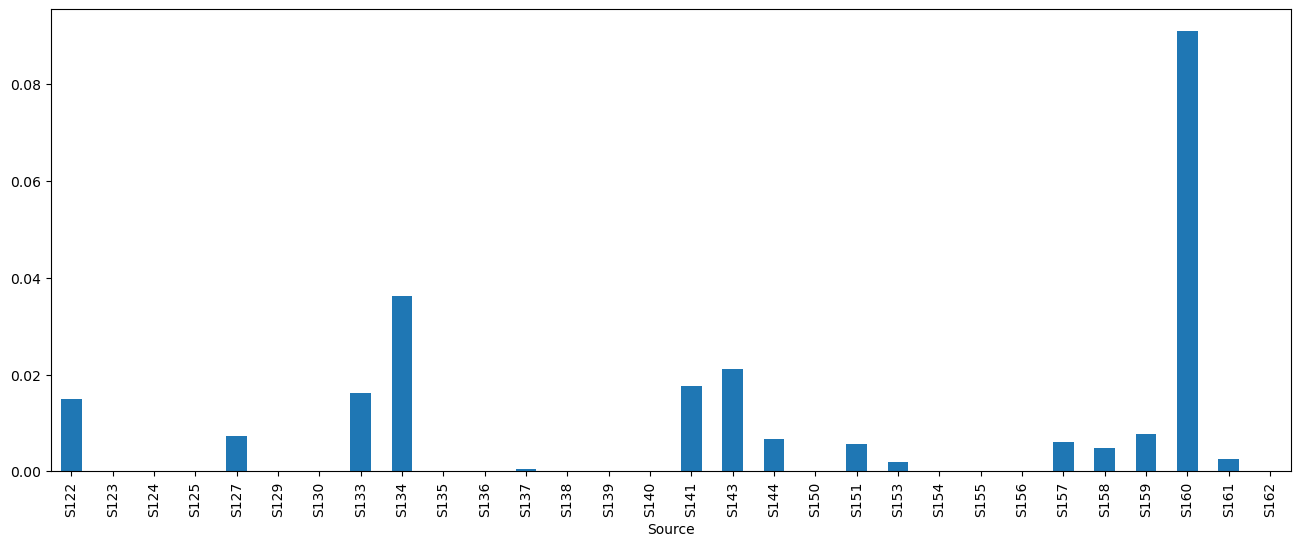

In [179]:
source_means.plot.bar(figsize=(16,6))

In [180]:
mapping_dict = dict(pd.cut(source_means[(source_means.index != 'S122') & 
                                        (source_means.index != 'S123')], 5, labels=range(5)))

In [183]:
def convert_source(source):
    if source in mapping_dict.keys():
        return mapping_dict[source]
    elif source in ['S122', 'S123']:
        return source
    else:
        return "Other"
    
data["Source"] = data.Source.apply(convert_source)

In [184]:
CATEGORICAL_FEATURES.append('Source')

### Final Summary

In [185]:
data.isna().sum()

Gender                               0
City                                 0
Monthly_Income                       0
Loan_Amount_Applied                  0
Loan_Tenure_Applied                  0
Existing_EMI                         0
Employer_Name                        0
Salary_Account                       0
Mobile_Verified                      0
Var5                                 0
Var1                                 0
Loan_Amount_Submitted                0
Loan_Tenure_Submitted                0
Interest_Rate                        0
Processing_Fee                       0
EMI_Loan_Submitted                   0
Filled_Form                          0
Device_Type                          0
Var2                                 0
Source                               0
Var4                                 0
Disbursed                        37717
Monthly_Income_Log                   0
Age                                  0
Lead_Creation_Month                  0
Missing_Loan_Amount_Appli

## Dataset preparation and train-test split

In [187]:
# Finally, we need to convert all categorical features into dummy variables, 
# scale continous variables and split dataset (with stratified fashion) into train and test subsets.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [188]:
continuous_features = data.drop(CATEGORICAL_FEATURES, axis = 1).columns.tolist()

col_transformer = ColumnTransformer([
    ('scaler', StandardScaler(), continuous_features)], remainder='passthrough')

In [189]:
continuous_features

['Monthly_Income',
 'Loan_Amount_Applied',
 'Loan_Tenure_Applied',
 'Existing_EMI',
 'Loan_Amount_Submitted',
 'Interest_Rate',
 'Processing_Fee',
 'EMI_Loan_Submitted',
 'Disbursed',
 'Monthly_Income_Log',
 'Age']

In [190]:
continuous_features.remove("Disbursed")
continuous_features

['Monthly_Income',
 'Loan_Amount_Applied',
 'Loan_Tenure_Applied',
 'Existing_EMI',
 'Loan_Amount_Submitted',
 'Interest_Rate',
 'Processing_Fee',
 'EMI_Loan_Submitted',
 'Monthly_Income_Log',
 'Age']

In [191]:
data = pd.get_dummies(data=data, columns=CATEGORICAL_FEATURES, drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124737 entries, 0 to 37716
Data columns (total 99 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Monthly_Income                      124737 non-null  int64  
 1   Loan_Amount_Applied                 124737 non-null  float64
 2   Loan_Tenure_Applied                 124737 non-null  float64
 3   Existing_EMI                        124737 non-null  float64
 4   Loan_Amount_Submitted               124737 non-null  float64
 5   Interest_Rate                       124737 non-null  float64
 6   Processing_Fee                      124737 non-null  float64
 7   EMI_Loan_Submitted                  124737 non-null  float64
 8   Disbursed                           87020 non-null   float64
 9   Monthly_Income_Log                  124737 non-null  float64
 10  Age                                 124737 non-null  int64  
 11  Gender_Male                

In [193]:
X_all = col_transformer.fit_transform(data.drop('Disbursed',inplace=False, axis=1))
y_all = data['Disbursed'].values

In [196]:
y_all

array([ 0.,  0.,  0., ..., nan, nan, nan])

In [195]:
X = X_all[:data_train.shape[0], :]
y = y_all[:data_train.shape[0]]

X_off = X_all[data_train.shape[0]:,:]

In [197]:
print(X.shape)
print(y.shape)

(87020, 98)
(87020,)


In [198]:
np.save('X_hcb.npy', X)
np.save('y_hcb.npy', y)